# **Using EasyOCR for OCR**

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
image 1/1 /content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp: 416x640 1 license_plate, 139.1ms
Speed: 2.6ms preprocess, 139.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected Number Plate: NND DL 7c0 1939 


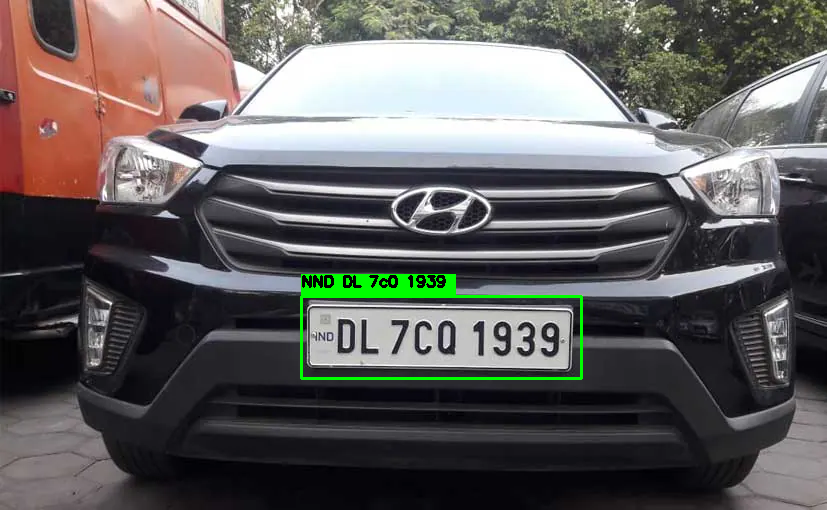


image 1/1 /content/images.jpg: 640x480 1 license_plate, 207.4ms
Speed: 3.2ms preprocess, 207.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Detected Number Plate: RJ228 9769 


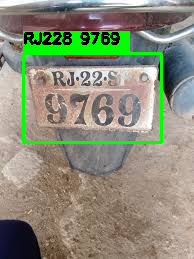


image 1/1 /content/why-are-number-plates-yellow-and-white.jpg: 416x640 1 license_plate, 138.7ms
Speed: 4.4ms preprocess, 138.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Detected Number Plate: SN66 XMZ 


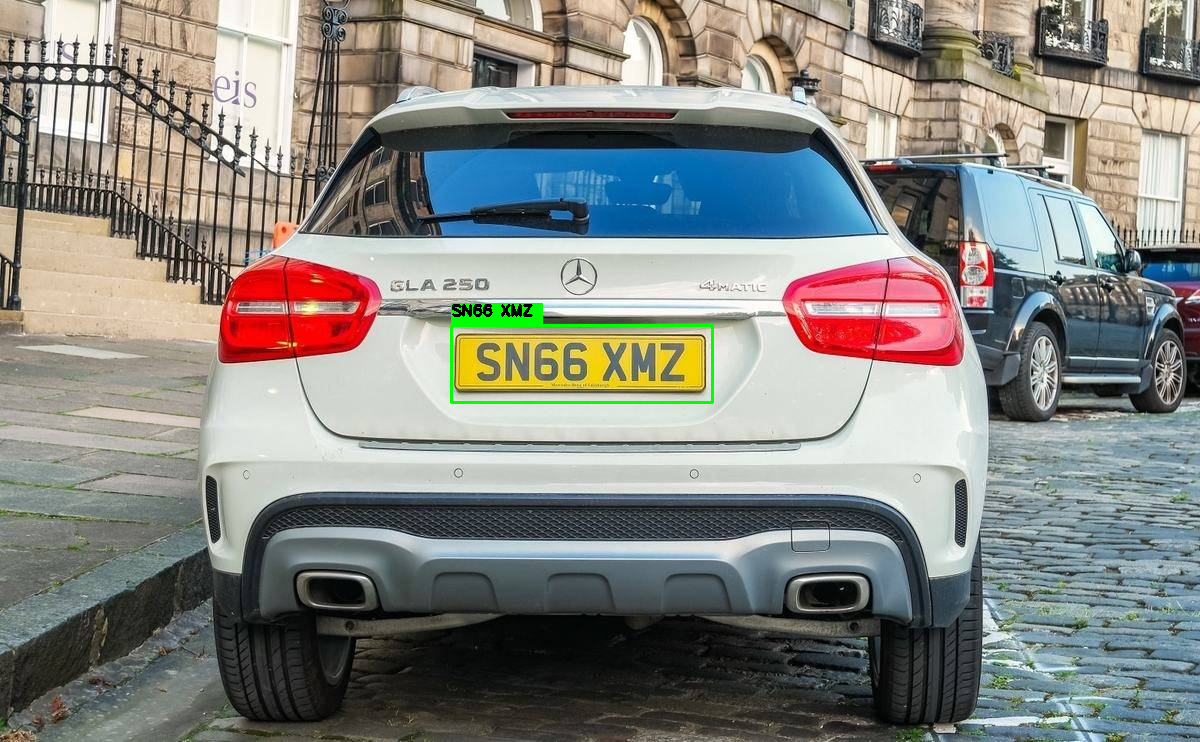


image 1/1 /content/download (1).jpg: 480x640 1 license_plate, 227.3ms
Speed: 3.3ms preprocess, 227.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Detected Number Plate: KA G2HP 9657 


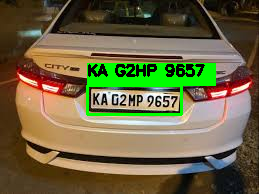

In [7]:
# !pip install ultralytics
# !pip install easyocr

from ultralytics import YOLO
import easyocr
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('/content/number_plate_detector.pt')
reader = easyocr.Reader(['en'])

def process_image(image_path):
    results = model(image_path)
    img = cv2.imread(image_path)
    number = ""

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = box.astype(int)

            number_plate_image = img[y1:y2, x1:x2]
            gray_number_plate_image = cv2.cvtColor(number_plate_image, cv2.COLOR_BGR2GRAY)


            ocr_results = reader.readtext(gray_number_plate_image)

            for (bbox, text, prob) in ocr_results:
                number = number + text + " "

    print(f"Detected Number Plate: {number}")

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    (text_width, text_height), baseline = cv2.getTextSize(number, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)

    cv2.rectangle(img, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)

    cv2.putText(img, number, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


    cv2_imshow(img)

image_paths = ['/content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp',
               '/content/images.jpg',
               '/content/why-are-number-plates-yellow-and-white.jpg',
               '/content/download (1).jpg']

for image_path in image_paths:
    process_image(image_path)


# **Using Pytesseract for OCR**


image 1/1 /content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp: 416x640 1 license_plate, 164.6ms
Speed: 11.3ms preprocess, 164.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
DL 7C0 1939}

Detected Number Plate: DL 7C0 1939} 


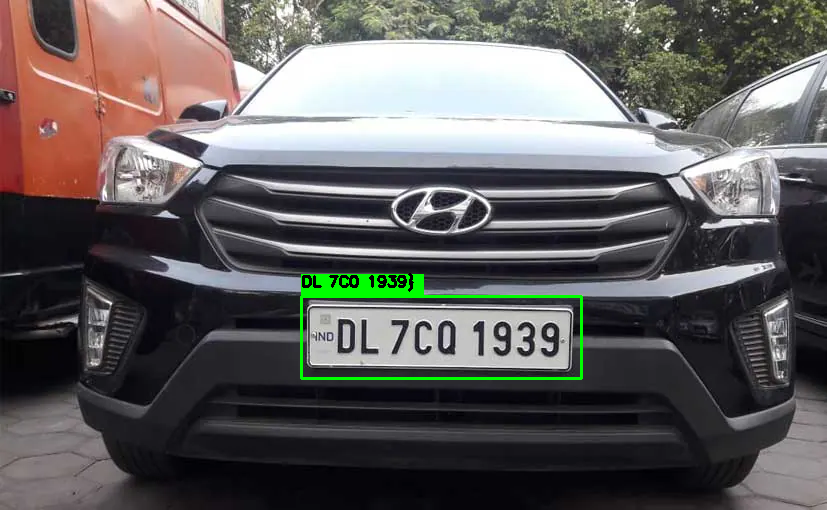


image 1/1 /content/images.jpg: 640x480 1 license_plate, 210.0ms
Speed: 3.3ms preprocess, 210.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
“res:

Detected Number Plate: “res: 


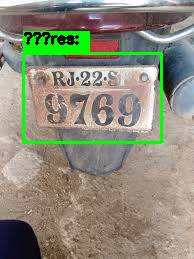


image 1/1 /content/why-are-number-plates-yellow-and-white.jpg: 416x640 1 license_plate, 161.2ms
Speed: 6.8ms preprocess, 161.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
[SN66 XMZ |

Detected Number Plate: [SN66 XMZ | 


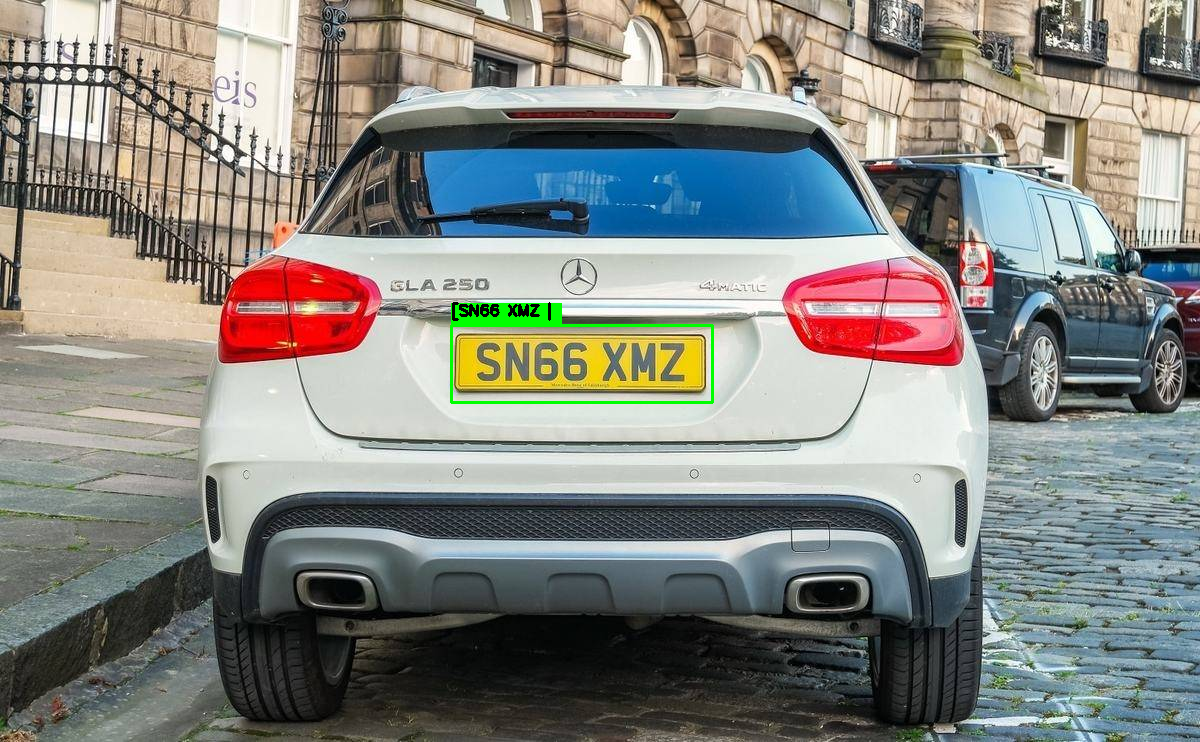


image 1/1 /content/download (1).jpg: 480x640 1 license_plate, 236.4ms
Speed: 7.4ms preprocess, 236.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
IKAG2HP 9657]

Detected Number Plate: IKAG2HP 9657] 


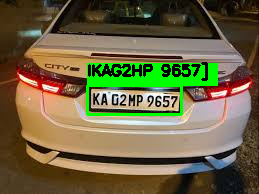

In [5]:
# !pip install ultralytics
# !apt-get install tesseract-ocr -y
# !pip install pytesseract

from ultralytics import YOLO
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

model = YOLO('/content/number_plate_detector.pt')

def process_image(image_path):
    results = model(image_path)
    img = cv2.imread(image_path)
    number = ""

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = box.astype(int)

            number_plate_image = img[y1:y2, x1:x2]
            gray_number_plate_image = cv2.cvtColor(number_plate_image, cv2.COLOR_BGR2GRAY)


            text = pytesseract.image_to_string(gray_number_plate_image, config='--psm 8')
            print(text)

            number = number + text.strip() + " "

    print(f"Detected Number Plate: {number}")

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    (text_width, text_height), baseline = cv2.getTextSize(number, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)

    cv2.rectangle(img, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)

    cv2.putText(img, number, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


    cv2_imshow(img)

image_paths = ['/content/a7sp8ji_high-security-number-plates_625x300_12_October_18.webp',
               '/content/images.jpg',
               '/content/why-are-number-plates-yellow-and-white.jpg',
               '/content/download (1).jpg']

for image_path in image_paths:
    process_image(image_path)